In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

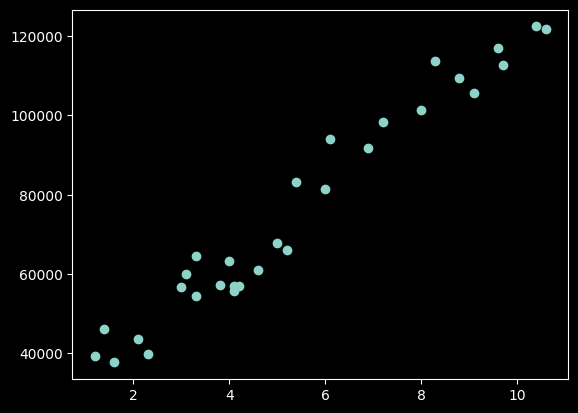

In [2]:
# Loading and visualizing the dataset, with experience and salary being the two fields
data = pd.read_csv('Salary_dataset.csv')
plt.scatter(data.Experience,data.Salary)
plt.show()

In [3]:
'''
Instead of running loops to find the optimal parameters θ_0 and θ_1.
Normal Equation helps to directly find the θ Matrix by simple Matrix Multiplication
Using the Steps:
    1. X Transpose * X
    2. Inversing The product
    3. Multiplying this result by X Transpose
    4. Mutliplying again by Y matrix
    i.e., θ = (X.T @ X)**(-1) @ X.T @ y

'''


def NormalEquation():
    x = np.array(data.Experience)
    ones = np.ones(x.shape[0])
    x = np.column_stack((x, ones))
    y = np.array(data.Salary)
    xT = x.transpose()
    x_inv = np.linalg.inv(np.dot(xT, x))
    theta = np.dot(np.dot(x_inv, xT), y)  # Normal Equation
    return theta

In [4]:
'''
To Actually perform linear regression using batch gradient regression,
    1. fix a learning rate (usually eithe 0.0001, 0.001 or 0.01)
    trial and error has allowed me to set it at 0.0001,
    2. Using loops and required variables we try to perform:
        θ_j := θ_j - α* Σ(i=1 to n)(y(i) - h(x(i)))*x(i)_j
        here, j = 0,1 i = 1-> length of data (number of rows)
    and our hypothesis function h(x) = (θ_0) + (θ_1*x)
'''
def stochasticGradientDescent(theta0,theta1):
    learning_rate = 0.0001
    for i in range(len(data)):
        x_i = data.Experience[i]
        y_i = data.Salary[i]
        hypothesis = theta0 + (theta1 * x_i)
        theta0 = theta0 - learning_rate * (hypothesis - y_i)
        theta1 = theta1 - learning_rate * (hypothesis - y_i) * x_i
    return theta0,theta1

In [5]:
'''
Running for a lower number of iterations (than batch gradient descent) gets us closer to accurate thetas
'''

theta0 = 0
theta1 = 0
iterations = 45000
for i in range(iterations):
    theta0,theta1 = stochasticGradientDescent(theta0,theta1)
    if(i % 500 == 0):
        print("Theta values after", i, "iterations of Gradient Descent: theta0 =", theta0, ", theta1 =", theta1)

Theta values after 0 iterations of Gradient Descent: theta0 = 218.6902694660178 , theta1 = 1374.4073580494592
Theta values after 500 iterations of Gradient Descent: theta0 = 8010.663425687233 , theta1 = 11886.009335740982
Theta values after 1000 iterations of Gradient Descent: theta0 = 12490.149113984107 , theta1 = 11237.435809760043
Theta values after 1500 iterations of Gradient Descent: theta0 = 15780.162392509017 , theta1 = 10761.083018154588
Theta values after 2000 iterations of Gradient Descent: theta0 = 18196.553051184273 , theta1 = 10411.219860038254
Theta values after 2500 iterations of Gradient Descent: theta0 = 19971.300847324437 , theta1 = 10154.258566719076
Theta values after 3000 iterations of Gradient Descent: theta0 = 21274.786162745404 , theta1 = 9965.53018897347
Theta values after 3500 iterations of Gradient Descent: theta0 = 22232.14696139716 , theta1 = 9826.916314072665
Theta values after 4000 iterations of Gradient Descent: theta0 = 22935.29235778333 , theta1 = 9725

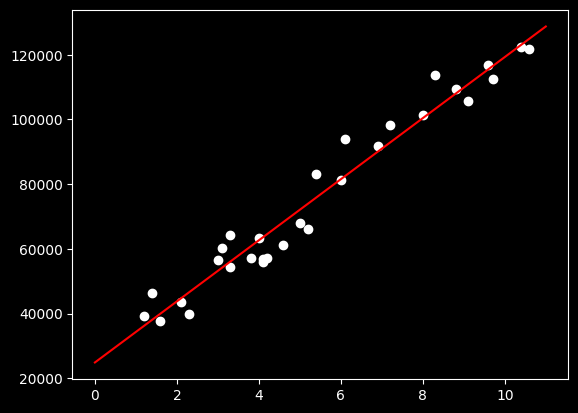

In [6]:
'''Plotting the graph of data and that of our hypothesis gives us a picture of the accuracy of alogirhtm with respect to our data'''

plt.scatter(data.Experience,data.Salary,color = 'white')
plt.plot(list(range(0,12)), [theta0 + theta1*x for x in range(0,12)], color = 'red')
plt.show()

In [8]:
print("Comparing the results of Stochastic Gradient Descent with Normal Equation") 
print("Gradient Stochastic Descent Thetas: ", np.array((np.array(theta1),np.array(theta0))))
print("Normal Equation Thetas:", NormalEquation())
print("Absolute Error in thetas is:")
print("Theta0 Error:", abs(NormalEquation()[0] - theta1))
print("Theta1 Error:", abs(NormalEquation()[1] - theta0))
print("Relative Error in thetas is")
print("Theta0 Relative Error:", abs(NormalEquation()[0] - theta1)/abs(NormalEquation()[0])*100,"%")
print("Theta1 Relative Error:", abs(NormalEquation()[1] - theta0)/abs(NormalEquation()[1])*100,"%")

Comparing the results of Stochastic Gradient Descent with Normal Equation
Gradient Stochastic Descent Thetas:  [ 9443.51819129 24880.15267721]
Normal Equation Thetas: [ 9449.96232146 24848.20396652]
Absolute Error in thetas is:
Theta0 Error: 6.44413016470935
Theta1 Error: 31.948710688247957
Relative Error in thetas is
Theta0 Relative Error: 0.06819212548687816 %
Theta1 Relative Error: 0.12857553298939026 %


We get

Absolute errors in thetas:
θ_0 relative error = 6.44413%
θ_1 relative error = 31.94871%

Relative errors in thetas:
θ_0 relative error = 0.06819%
θ_1 relative error = 0.12857%


In [ ]:
# Making predictions
# Lets take an example that is already there in our training example to check the accuracy of the predictions.
print("Predicted salary for 1.2 years of experience:", theta0 + theta1*1.2)
print("Actual Salary for 1.2 years of Experience: ", data.Salary[0])
print("Percentage of difference in the Actual and Predicted Salaries is: ", ((data.Salary[0] - (theta0 + theta1*1.2))/data.Salary[0])*100,"%")

# Now we can predict salary for lets say experience of 8 years with accuracy
print("Predicted salary for 8 years of experience:",theta0 + theta1*8)

Predicted salary for 8 years of experience: 36212.37450675984
Actual Salary for 1.2 years of Experience:  39344
Percentage of difference in the Actual and Predicted Salaries is:  7.959601192660017 %
Predicted salary for 8 years of experience: 100428.29820753435


Stochastic Gradient Descent is much faster than Batch Gradient Descent while also maintaining the prediction accuracy.
It is much better for a large amount data samples in out set
